In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import time
import re

# SELENIUM - XPath Webscraping

## E-book Scraping:
Here is the link for the top 1,000 E-books at the Greater Phoenix Digital Library.

In [2]:
url_e = 'https://phoenix.overdrive.com/collection/25972'

We will use the driver to access the website:

In [3]:
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))

We will use Selenium to utilize the Chrome web driver to access and scrape the data using their XPaths.

Here is the code to access the information for just the first book:

In [ ]:
#container_e = driver.find_element(By.XPATH, ".//section[contains(@id, 'search')]")
#all_books = container_e.find_elements(By.XPATH, ".//li[contains(@class, 'js-titleCard Item')]")

In [6]:
#all_books[0].find_element(By.XPATH, ".//h3[contains(@class, 'title-name')]").text  # book title
#all_books[0].find_element(By.XPATH, ".//p[contains(@class, 'title-author')]").text.replace('by ', '')  # author
#all_books[0].find_element(By.XPATH, ".//div[contains(@class, 'title-header-bar')]").text  # availability
#all_books[0].find_element(By.XPATH, ".//span[contains(@class, 'title-format-badge')]").text  # book format
#all_books[0].find_element(By.XPATH, ".//div[contains(@class, 'TitleInfo')]/h3/a").get_attribute('href')  # book link

#pagination = driver.find_element(By.XPATH, './/ul[contains(@class, "Pagination-itemsContainer")]')
#pagination.find_elements(By.XPATH, './/a[contains(@class, "Pagination-item")]')[-2].text

We will use that same code to access the information for all the books.

*Since the list is very long and on 42 different sites, we will limit our scraping to just the first 10 pages (top 240 e-books).*

In [5]:
book_titles = []
book_authors = []
book_availability = []
book_formats = []
book_links = []
book_ranks = []

current_page = 1
last_page = 10  # we will only scrape the first 10 pages (240 elements total)
rank = 1

driver.get(url_e)

while current_page <= last_page:
    container_e = driver.find_element(By.XPATH, ".//section[contains(@id, 'search')]")
    all_ebooks = container_e.find_elements(By.XPATH, ".//li[contains(@class, 'js-titleCard Item')]")

    for book in all_ebooks:
        title = book.find_element(By.XPATH, ".//h3[contains(@class, 'title-name')]").text
        book_titles.append(title)

        author = book.find_element(By.XPATH, ".//p[contains(@class, 'title-author')]").text.replace('by ', '')
        book_authors.append(author)

        availability = book.find_element(By.XPATH, ".//div[contains(@class, 'title-header-bar')]").text
        book_availability.append(availability)

        format = book.find_element(By.XPATH, ".//span[contains(@class, 'title-format-badge')]").text
        book_formats.append(format)

        link = book.find_element(By.XPATH, ".//div[contains(@class, 'TitleInfo')]/h3/a").get_attribute('href')
        book_links.append(link)

        book_ranks.append(rank)
        rank += 1

    try:
        next_button = driver.find_element(By.XPATH, './/a[contains(@class, "Pagination-item") and @aria-label="Next page"]')
        next_button.click()
        current_page += 1
        time.sleep(2)

    except:
        pass
 
driver.quit()


In [6]:
book_ranks[-1]

240

## Audiobook Scraping:
Here is the link for the top 1,000 audiobooks on the Greater Phoenix Digital Library.

In [7]:
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))

url_a = 'https://phoenix.overdrive.com/collection/25978'

Since we want our database to be altogether, we will not declare new book lists. We will simply add on to our lists already defined in the ebook section. We will gather all the same information.

Similarly, we will only scrape the first 10 pages, accessing the top 240 audiobooks and truncating them on our ebook list for a grand total of the top 480 books (there may be some overlap).

In [8]:
current_page = 1  # redeclare this variable to reset to the first page of the new url
last_page = 10  # we will only scrape the first 10 pages (240 elements total)
rank = 1  # reset to 1

driver.get(url_a)

while current_page <= last_page:
    container_a = driver.find_element(By.XPATH, ".//section[contains(@id, 'search')]")
    all_abooks = container_a.find_elements(By.XPATH, ".//li[contains(@class, 'js-titleCard Item')]")

    for book in all_abooks:
        title = book.find_element(By.XPATH, ".//h3[contains(@class, 'title-name')]").text
        book_titles.append(title)

        author = book.find_element(By.XPATH, ".//p[contains(@class, 'title-author')]").text.replace('by ', '')
        book_authors.append(author)

        availability = book.find_element(By.XPATH, ".//div[contains(@class, 'title-header-bar')]").text
        book_availability.append(availability)

        format = book.find_element(By.XPATH, ".//span[contains(@class, 'title-format-badge')]").text
        book_formats.append(format)

        link = book.find_element(By.XPATH, ".//div[contains(@class, 'TitleInfo')]/h3/a").get_attribute('href')
        book_links.append(link)

        book_ranks.append(rank)
        rank += 1

    try:
        next_button = driver.find_element(By.XPATH, './/a[contains(@class, "Pagination-item") and @aria-label="Next page"]')
        next_button.click()
        current_page += 1
        time.sleep(2)

    except:
        pass
 
driver.quit()


In [9]:
book_ranks[-1]

240

## Accessing Individual Websites   
Now that we have scraped our list of books with Selenium, we will continue scraping our data, now from each individual website.

In [10]:
book_links[0:5]

['https://phoenix.overdrive.com/media/9768977?cid=25972',
 'https://phoenix.overdrive.com/media/8839068?cid=25972',
 'https://phoenix.overdrive.com/media/5376582?cid=25972',
 'https://phoenix.overdrive.com/media/2461050?cid=25972',
 'https://phoenix.overdrive.com/media/10012377?cid=25972']

Since we'll be opening 480 individual sites, we want to now operate with a sleep timer in our for loop to sleep for two seconds after accessing each link.

While this will take our code much longer to run, we want to follow good practice in web scraping and avoid crashing or overloading any website.

*Depending on the speed of your computer and browser, the code will run for at least 960 seconds (16 minutes). Mine ran for about 20 minutes.*

In [37]:
#driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
#driver.get(book_links[2])
#container = driver.find_element(By.CLASS_NAME, 'title-header-container')

# COPIES TOTAL
#copies_x = container.find_element(By.XPATH, ".//span[contains(@class, 'availabilityText')]").text
#copies_y = re.sub(r' cop(y|ies) available', '', copies_x)  # removes the phrase
#copies = int(re.sub(r'.* of ', '', copies_y))

# STARS RATING
#stars = container.find_element(By.XPATH, ".//div[contains(@class, 'StarRating')]").get_attribute('data-global-rating')

#driver.quit()

In [40]:
driver.quit()

In [41]:
book_copies = []
book_ratings = []

count = 0

driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))  #, options=options

for link in book_links:
    count += 1
    driver.get(link)
    
    time.sleep(2)
    
    container = driver.find_element(By.CLASS_NAME, 'title-header-container')

    try:
        copies_x = container.find_element(By.XPATH, ".//span[contains(@class, 'availabilityText')]").text
        copies_y = re.sub(r' cop(y|ies) available', '', copies_x)  # removes the phrase 'copies available'
        copies = int(re.sub(r'.* of ', '', copies_y))  # keeps only the number of copies
    except:
        copies = None
    book_copies.append(copies)

    try:
        rating_x = container.find_element(By.XPATH, ".//div[contains(@class, 'StarRating')]").get_attribute('data-global-rating')
        rating = float(rating_x)
    except:
        rating = None
    book_ratings.append(rating)
    
    
driver.quit()
        

In [42]:
len(book_ratings)

480

In [46]:
type(book_copies[0])

int

# PANDAS DataFrame
Now we will assemble the data we have just scraped into a pandas dataframe

In [48]:
top_books = pd.DataFrame({'Rank': book_ranks, 'Title': book_titles, 'Author': book_authors, 'Rating': book_ratings,
                          'Format': book_formats, 'Copies': book_copies, 'Availability': book_availability})
top_books.head()

,Rank,Title,Author,Rating,Format,Copies,Availability
0,1,The Women,Kristin Hannah,4.5,EBOOK,25.0,WAIT LIST
1,2,Desert Star,Michael Connelly,4.3,EBOOK,25.0,AVAILABLE
2,3,Five Total Strangers,Natalie D. Richards,3.5,EBOOK,12.0,AVAILABLE
3,4,It Ends With Us,Colleen Hoover,4.3,EBOOK,15.0,WAIT LIST
4,5,Funny Story,Emily Henry,4.2,EBOOK,18.0,WAIT LIST


In [49]:
# Save the dataframe to a csv file
top_books.to_csv('AZ_top_books.csv', index=False)

# Exploratory Data Analysis
Here we will calculate summary statistics & create plots that help explain and summarize the data we just scraped.

## Exploratory Plots
Let's use Seaborn and matplotlib to summarize the data using plots

<Axes: xlabel='Availability', ylabel='count'>

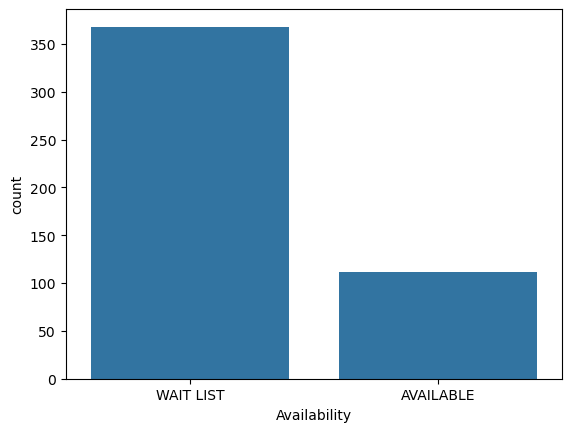

In [51]:
# Create a bar plot of books marked 'wait list' and books marked 'available'
sns.countplot(data=top_books, x='Availability')

<Axes: xlabel='Rank', ylabel='Rating'>

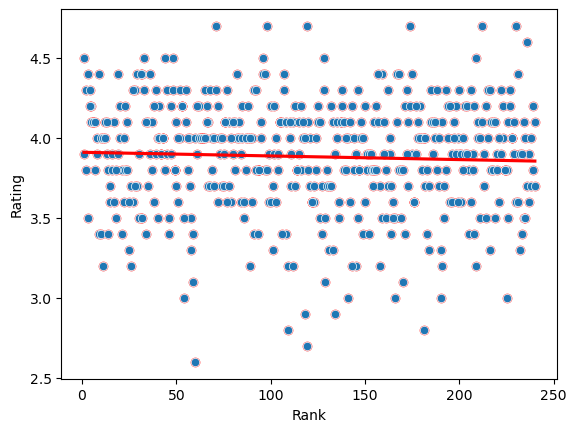

In [59]:
# Create a scatter plot of the rank and the rating of the books
# Layer a regression line on top of the scatter plot, remove SE bars
sns.regplot(data=top_books, x='Rank', y='Rating', ci=None, color='red')
sns.scatterplot(data=top_books, x='Rank', y='Rating')

<Axes: xlabel='Rank', ylabel='Copies'>

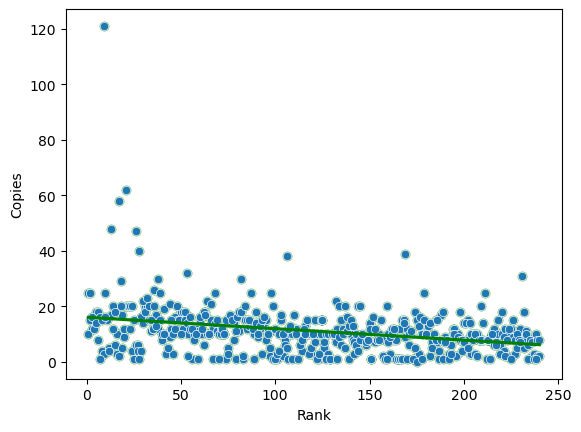

In [60]:
# Create a scatter plot of the rank and the number of copies of the books
# Layer a regression line on top of the scatter plot, remove SE bars
sns.regplot(data=top_books, x='Rank', y='Copies', ci=None, color='green')
sns.scatterplot(data=top_books, x='Rank', y='Copies')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Sarah J. Maas'),
  Text(1, 0, 'James Patterson'),
  Text(2, 0, 'John Grisham'),
  Text(3, 0, 'Lee Child'),
  Text(4, 0, 'David Baldacci'),
  Text(5, 0, 'Freida McFadden'),
  Text(6, 0, 'Michael Connelly'),
  Text(7, 0, 'Colleen Hoover'),
  Text(8, 0, 'Kristin Hannah'),
  Text(9, 0, 'Emily Henry')])

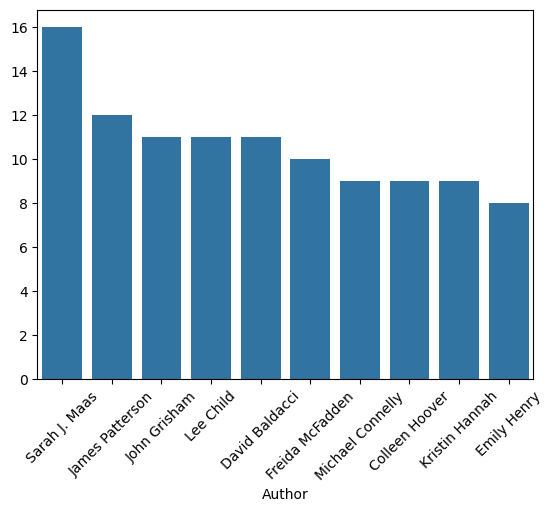

In [68]:
# Create a bar plot of the top 5 authors with the most books in the dataset
top_authors = top_books['Author'].value_counts().head(10)

# Rotate authors' names for better visualization
sns.barplot(x=top_authors.index, y=top_authors.values)
plt.xticks(rotation=45)

## Summary Statistics
Let's summarize the data in our plots

In [71]:
# Which books appear as both an ebook and an audiobook?
ebooks = top_books[top_books['Format'] == 'EBOOK']
audiobooks = top_books[top_books['Format'] == 'AUDIOBOOK']

# find the titles (with the authors column) that appear in both 'ebooks' and 'audiobooks'
common_books = ebooks.merge(audiobooks, on=['Title', 'Author'], how='inner')
common_books[['Title', 'Author']]

,Title,Author
0,The Women,Kristin Hannah
1,Desert Star,Michael Connelly
2,It Ends With Us,Colleen Hoover
3,Funny Story,Emily Henry
4,Iron Flame,Rebecca Yarros
...,...,...
94,Ruthless Vows,Rebecca Ross
95,The Four Winds,Kristin Hannah
96,The Only One Left,Riley Sager
97,"Friends, Lovers, and the Big Terrible Thing",Matthew Perry


In [73]:
# Find average rating of books that are audio books and books that are ebooks
rating_e = ebooks['Rating'].mean()
rating_a = audiobooks['Rating'].mean()
print(r'Average ebook rating: ', rating_e)
print(r'Average audiobook rating: ', rating_a)

Average ebook rating:  3.910416666666667
Average audiobook rating:  3.8549999999999995


In [74]:
# Calculate the correlation between the rating and the rank
correlation = top_books['Rating'].corr(top_books['Rank'])
print(r'Correlation between rating and rank: ', correlation)

Correlation between rating and rank:  -0.04544902953768914


In [76]:
# Average number of copies of books that are available and books that are on wait list
copies_a = top_books[top_books['Availability'] == 'AVAILABLE']['Copies'].mean()
copies_wl = top_books[top_books['Availability'] == 'WAIT LIST']['Copies'].mean()
print(r'Average number of copies of available books: ', copies_a)
print(r'Average number of copies of books on wait list: ', copies_wl)

Average number of copies of available books:  15.911764705882353
Average number of copies of books on wait list:  9.796195652173912


In [77]:
# Print max and min number of copies of books
max_copies = top_books['Copies'].max()
min_copies = top_books['Copies'].min()
print(r'Max number of copies: ', max_copies)
print(r'Min number of copies: ', min_copies)

# Print the title of the book with the highest rating
max_rating = top_books['Rating'].max()
title_max = top_books[top_books['Rating'] == max_rating]['Title'].values[0]
print(r'Book with the highest rating: ', title_max)

# Print the title of the book with the lowest rating
min_rating = top_books['Rating'].min()
title_min = top_books[top_books['Rating'] == min_rating]['Title'].values[0]
print(r'Book with the lowest rating: ', title_min)

# Print the title of the book with the most copies
most_copies = top_books['Copies'].max()
title_most = top_books[top_books['Copies'] == most_copies]['Title'].values[0]
print(r'Book with the most copies: ', title_most)



Max number of copies:  121.0
Min number of copies:  0.0
Book with the highest rating:  A Court of Mist and Fury
Book with the lowest rating:  The Life Impossible
Book with the most copies:  The Boyfriend
